# NN 2진분류
- 오렌지, 그레이프 후추츠 분류문제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

SEED = 123

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv')
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


## Data 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


<Axes: xlabel='name', ylabel='diameter'>

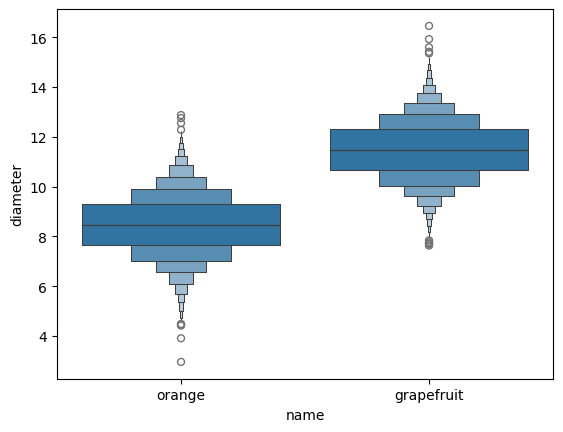

In [4]:
sns.boxenplot(data=df,x='name',y='diameter')

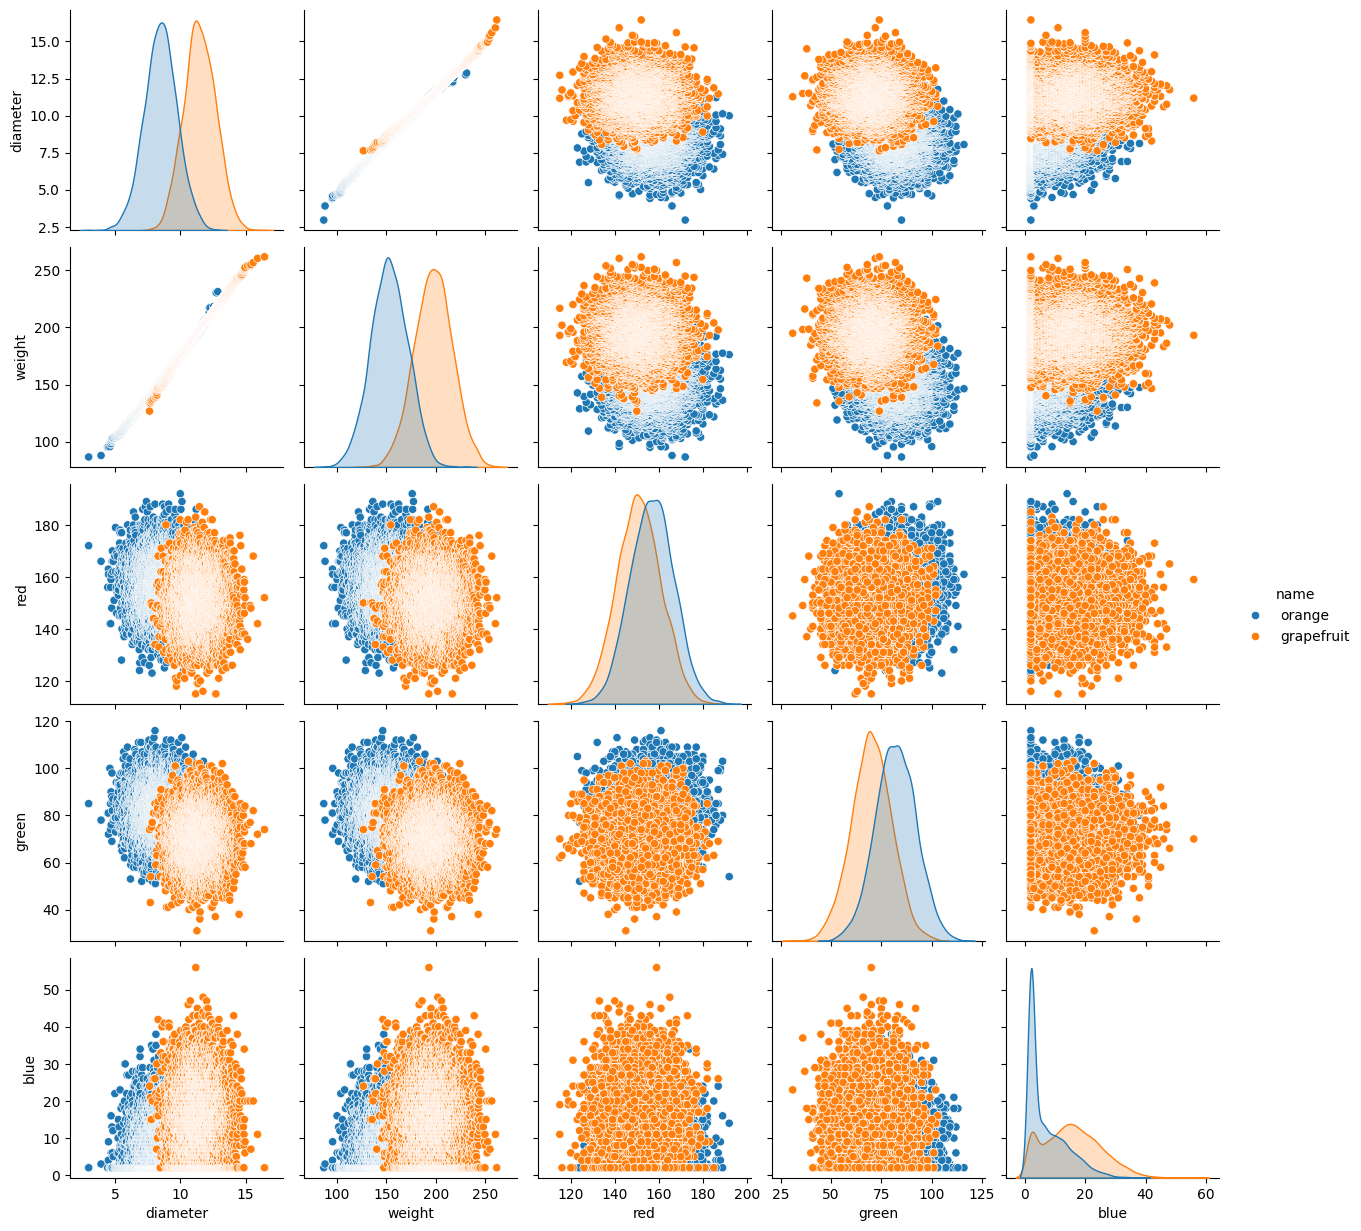

In [5]:
sns.pairplot(df, hue="name")
plt.show()

## 범주형

<Axes: xlabel='name'>

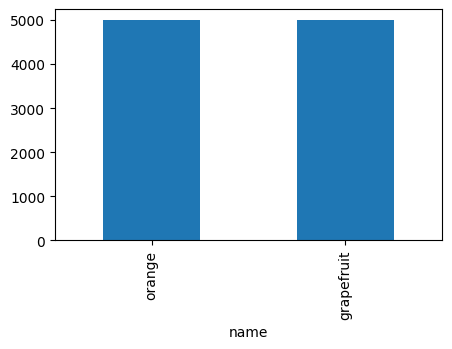

In [6]:
df['name'].value_counts().plot(kind='bar',figsize=(5,3)) # 데이터 균형 확인

## 수치형

<Axes: >

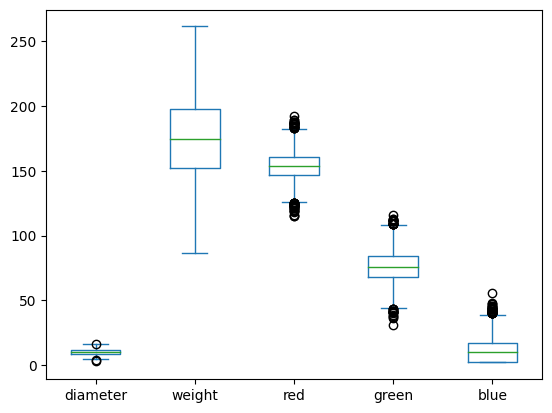

In [7]:
# diameter, weight, red, green, blue
df[['diameter','weight','red','green','blue']].plot(kind='box')

In [8]:
df.isna().sum(axis=0)

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.sample(frac=1,random_state=SEED)
df.head()

,name,diameter,weight,red,green,blue
2656,orange,8.58,153.86,143,76,2
445,orange,6.80,127.51,161,87,4
9505,grapefruit,13.08,221.93,163,67,16
332,orange,6.59,124.75,162,96,3
4168,orange,9.67,171.24,161,88,15


### X,y 변수 분리

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('name',axis=1)
y = df['name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

## scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## 인코딩

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_test_e = le.transform(y_test)
y_train_e


array([0, 0, 0, ..., 0, 1, 1])

## 모델 생성

In [22]:
X_train_s.shape,X_test_s.shape,y_train_e.shape,y_test_e.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [16]:
from keras import layers
model = keras.Sequential([
    layers.Dense(units=5,activation='relu',input_shape=(5,)),
    layers.Dense(units=3,activation='relu'),
    layers.Dense(units=1,activation='sigmoid'),
])

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

EPOCHS = 50
BATCH_SIZE = 32

history = model.fit(X_train_s,
                    y_train_e,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split = 0.2)

Epoch 1/50
200/200 [==============================] - 3s 8ms/step - loss: 4.4590 - accuracy: 0.5077 - val_loss: 3.8811 - val_accuracy: 0.4831
Epoch 2/50
200/200 [==============================] - 2s 9ms/step - loss: 2.4922 - accuracy: 0.5437 - val_loss: 1.2764 - val_accuracy: 0.6594
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 0.7742 - accuracy: 0.7883 - val_loss: 0.4744 - val_accuracy: 0.8575
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4102 - accuracy: 0.8841 - val_loss: 0.3017 - val_accuracy: 0.9125
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.9086 - val_loss: 0.2461 - val_accuracy: 0.9231
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2775 - accuracy: 0.9175 - val_loss: 0.2208 - val_accuracy: 0.9325
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2574 - accuracy: 0.9216 - val_loss: 0.2076 - val_accuracy: 0.9300
Epoch

## 예측

In [24]:
y_pred = model.predict(X_test_s)
y_pred

63/63 [==============================] - 0s 3ms/step


array([[0.323135  ],
       [0.99889225],
       [0.22000645],
       ...,
       [0.01841278],
       [0.06904102],
       [0.9990043 ]], dtype=float32)

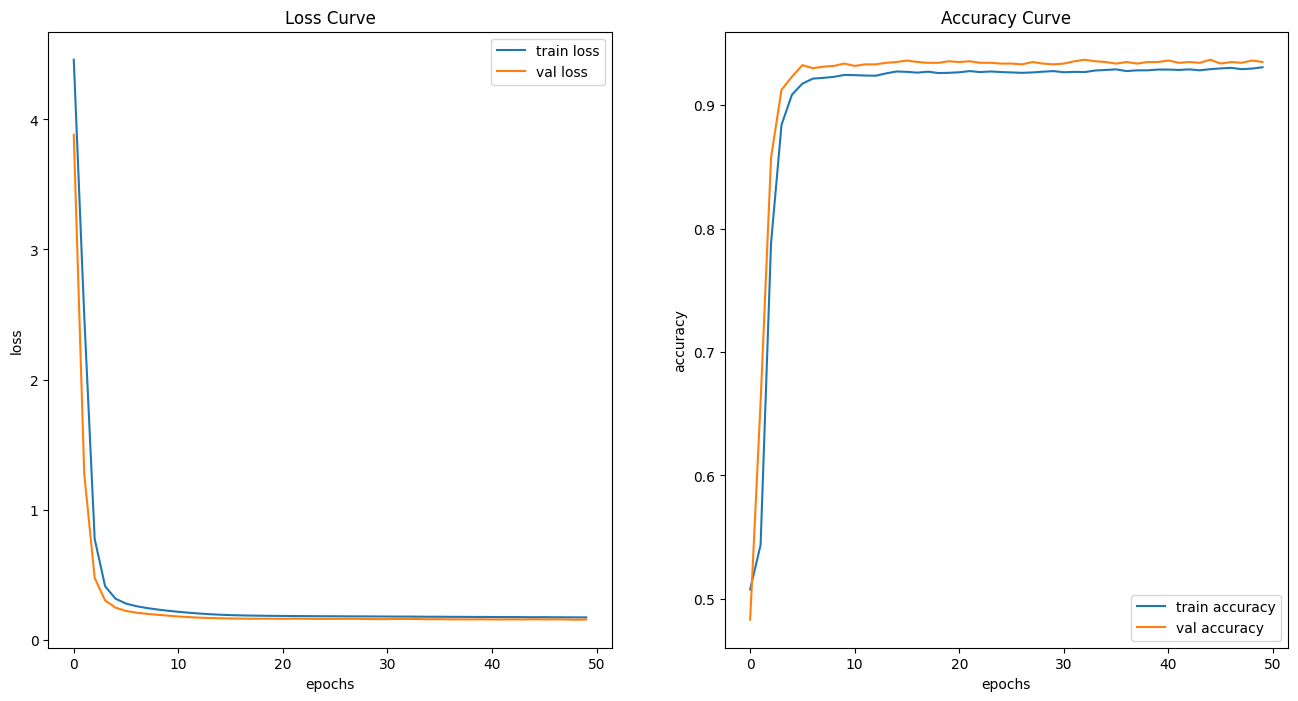

In [25]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

In [29]:
y_test_e

array([1, 1, 0, ..., 0, 0, 1])

In [31]:
y_pred = (y_pred > 0.5).astype(int)
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

accuracy: 0.9335
recall: 0.9335668463536351
precision: 0.9334302497122013
f1 : 0.9334796281361166


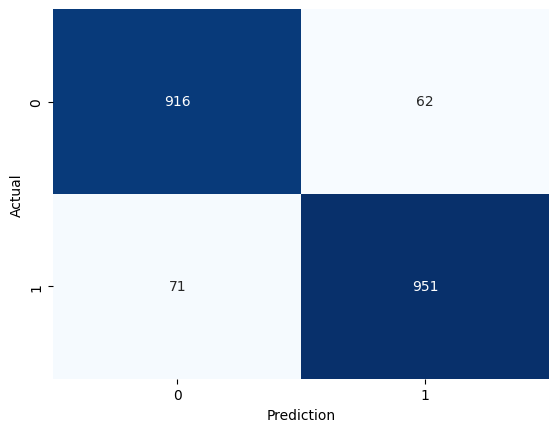

In [33]:
print_metrics(y_test_e, y_pred, aver='macro')